In [1]:
import yaml
import numpy as np
from matplotlib import pyplot as plt
import os
import sys
import importlib
import networkx as nx
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import copy
from copy import deepcopy
 
sys.path.append('../')
from utils.utils import ModelLoader,DepLoader
%load_ext autoreload
%autoreload 2
%load_ext line_profiler
%matplotlib inline

# 读取配置文件，两张扑克德州

In [2]:
with open('../config/rule_two_card.yaml') as fhdl:
    cfg = yaml.load(fhdl)

/root/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  


# 初始化牌堆

In [3]:
deck = ModelLoader(cfg['deck'])

# 使用 依赖注入管理 方式构建这些组件

In [6]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [8]:
env = DepLoader(cfg)

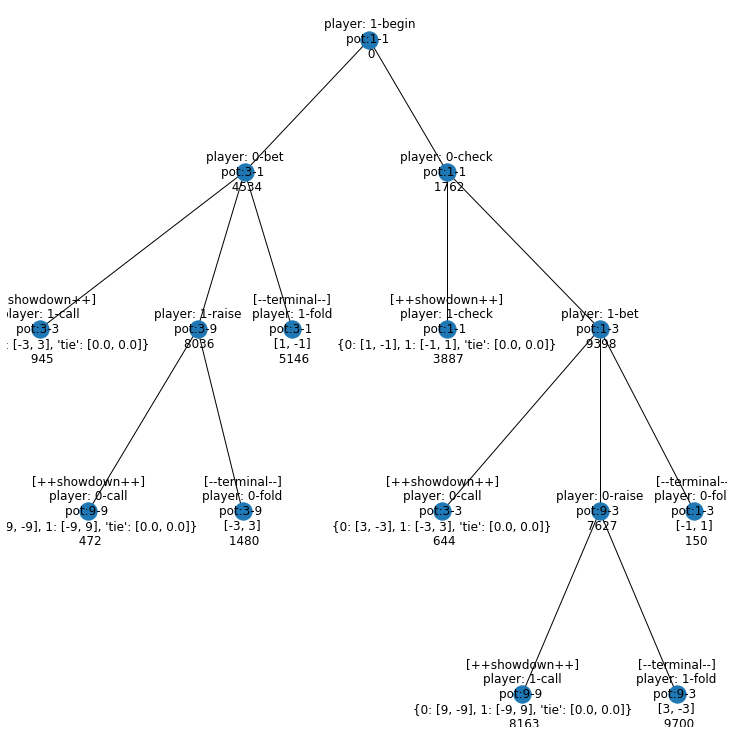

In [12]:
plt.figure(figsize=(10,10))
env.tree_builder.plot_tree()

# 进一步优化,提升 速度

In [10]:
env = DepLoader(cfg)

In [11]:
%lprun -f env.trainer.cfr env.trainer.train()

Expected value after 1000 iterations: [-0.13691552  0.13691552]
Expected value after 2000 iterations: [-0.05648699  0.05648699]
Expected value after 3000 iterations: [-0.06654804  0.06654804]
Expected value after 4000 iterations: [-0.07476952  0.07476952]
Expected value after 5000 iterations: [-0.04450941  0.04450941]
Expected value after 6000 iterations: [-0.03731457  0.03731457]
Expected value after 7000 iterations: [-0.05235646  0.05235646]
Expected value after 8000 iterations: [-0.06466576  0.06466576]
Expected value after 9000 iterations: [-0.06978512  0.06978512]
Expected value after 10000 iterations: [-0.06857357  0.06857357]
Expected value after 11000 iterations: [-0.0705704  0.0705704]
Expected value after 12000 iterations: [-0.06862823  0.06862823]
Expected value after 13000 iterations: [-0.06848044  0.06848044]
Expected value after 14000 iterations: [-0.06736129  0.06736129]
Expected value after 15000 iterations: [-0.06631027  0.06631027]
Expected value after 16000 iteration

Timer unit: 1e-06 s

Total time: 24.2278 s
File: ../texas/optimizer_cfr.py
Function: cfr at line 67

Line #      Hits         Time  Per Hit   % Time  Line Contents
    67                                               def cfr(self,cards,node,reach_probs):
    68    750000       742531      1.0      3.1          player = node.player
    69                                                   # 一个infoset是有私有信息（自己的手牌） 和公共信息（双方的下注，这里记录在node中）构成的
    70    750000       676959      0.9      2.8          holdcard = cards[player]
    71    750000      1325600      1.8      5.5          infoset = self.infosets[player] + node.serialize()#self.card_abstraction.abstract(holdcard) + node.serialize()
    72                                                   
    73    750000       702052      0.9      2.9          if node.terminal == True:
    74    200000       182575      0.9      0.8              if self.debug:
    75                                                           print(cards,node.serialize

Expected value after 49000 iterations: [-0.07194032  0.07194032]
